In [17]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_common import dlc, sigmoid, plot_data, plt_tumor_data, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob

In [48]:
%matplotlib widget
plt.style.use("./deeplearning.mplstyle")
np.set_printoptions(precision=2)

In [19]:
xtr = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
ytr = np.array([0, 0, 0, 1, 1, 1]) 

In [11]:
def compute_log_cost(x, y, w, b):
    m, n = x.shape
    total_cost = 0
    for i in range(m):
        z = w.dot(x[i])+b
        g = sigmoid(z)
        total_cost += -y[i]*np.log(g) - (1-y[i])*np.log(1-g)
    total_cost /= m

    return total_cost

In [12]:
compute_log_cost(xtr, ytr, np.array([1,1]), -3)

np.float64(0.36686678640551745)

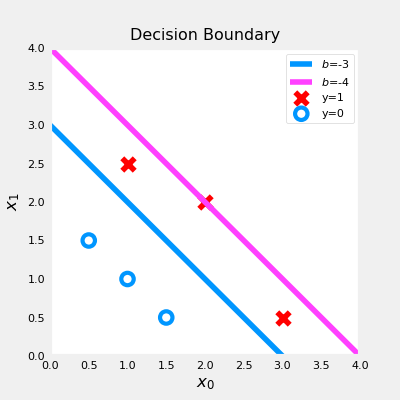

In [14]:
import matplotlib.pyplot as plt

# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c=dlc["dlblue"], label="$b$=-3")
ax.plot(x0,x1_other, c=dlc["dlmagenta"], label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(xtr,ytr,ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [16]:
print(compute_log_cost(xtr, ytr, np.array([1,1]), -3))

print(compute_log_cost(xtr, ytr, np.array([1,1]), -4))

0.36686678640551745
0.5036808636748461


In [57]:
def compute_log_gradient(x, y, w, b):
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        pred = sigmoid(w.dot(x[i])+b)
        err = pred - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i,j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

In [59]:
compute_log_gradient(xtr, ytr, np.array([2.,3.]), 1)

(array([0.5, 0.5]), np.float64(0.49861806546328574))

In [69]:
def gradient_descent(x, y, w_in, b_in, alpha, iters, cost=compute_log_cost, grad= compute_log_gradient):
    j_history = []
    p_history = []

    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(iters):
        dw, db = grad(x, y, w, b)
        w -= alpha * dw
        b -= alpha * db

        if i < 100000:
            j_history.append(cost(x, y, w, b))
            p_history.append([w, b])
        if i% math.ceil(iters/10)==0:
            print(f"Iterations: {i}, Cost: {j_history[-1]:0.4f}")

    return w, b, j_history, p_history

In [70]:
w, b, _, _ = gradient_descent(xtr, ytr, np.zeros_like(xtr[0]), 0, 0.1, 10000)
print(f"W= {w}, B= {b}")

Iterations: 0, Cost: 0.6846
Iterations: 1000, Cost: 0.1591
Iterations: 2000, Cost: 0.0846
Iterations: 3000, Cost: 0.0571
Iterations: 4000, Cost: 0.0429
Iterations: 5000, Cost: 0.0343
Iterations: 6000, Cost: 0.0286
Iterations: 7000, Cost: 0.0245
Iterations: 8000, Cost: 0.0214
Iterations: 9000, Cost: 0.0190
W= [5.28 5.08], B= -14.222409982019837
